# 16_ShootLengthGrowth_Vis
In diesem Jupyter Notebook werden das Wachstum gemessen an den Messstreifen in einer Visualisierung dargestellt.

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und bearbeitet.*

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# CSV-Datei einlesen
df = pd.read_csv("./170_BaseData/zeitreihe_pg_auswertung.csv", delimiter=';')

### 1. Visualisierung der RMSE Werte der Kirsche (Zeitreihe)

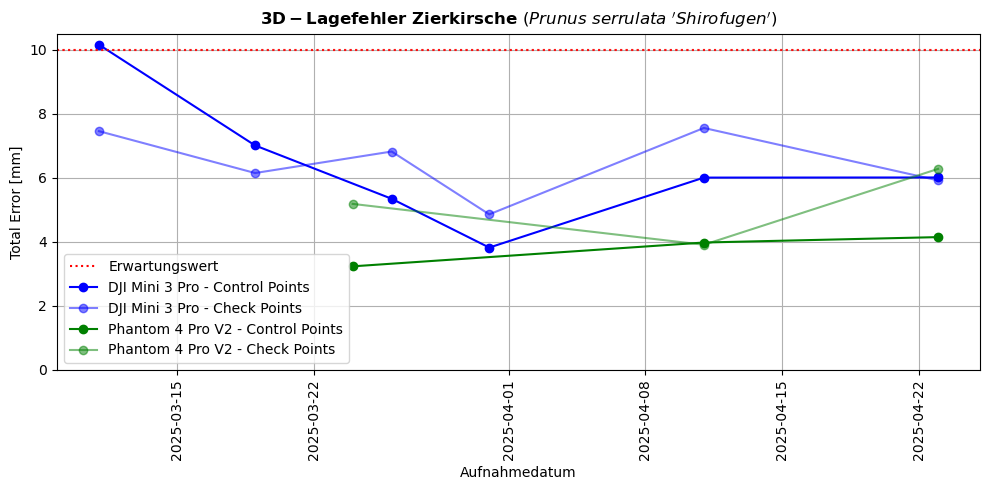

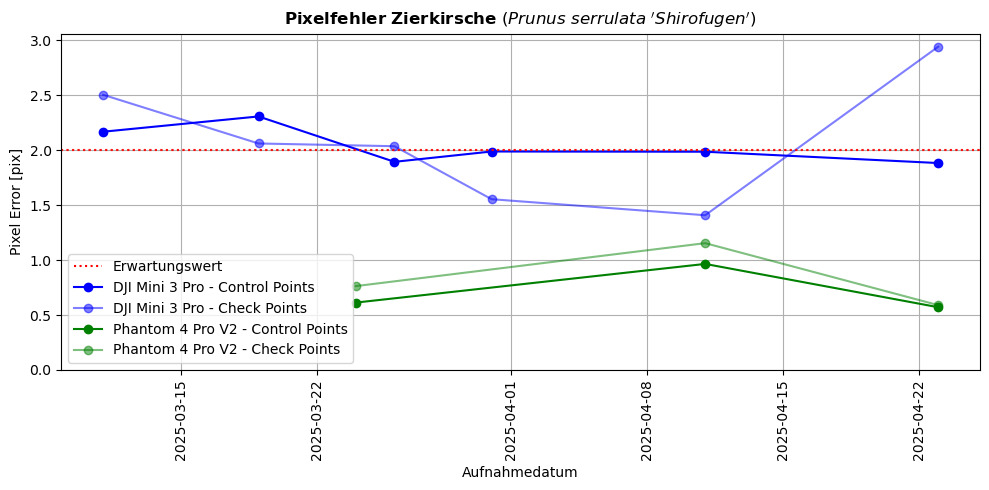

In [36]:
# Datentypen anpassen
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')
df['3D_ERROR CHECK'] = pd.to_numeric(df['3D_ERROR CHECK'], errors='coerce')
df['PIX_ERRROR CHECK'] = pd.to_numeric(df['PIX_ERRROR CHECK'], errors='coerce')

# Farbschema für Drohnen
color_map = {
    'dji mini 3 pro': 'blue',
    'dji phantom 4 rtk': 'green',
    'cranecam': 'red'
}

# Referenzlinien
reference_lines = {
    'dji mini 3 pro': {'PIX': 2.0, '3D': 10},
    'dji phantom 4 rtk': {'PIX': 2.0, '3D': 10},
    'cranecam': {'PIX': 0.5, '3D': 15}
}
# Legnde
legend_elements = [
    mlines.Line2D([], [], color='red', linestyle=':', label='Erwartungswert'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='-', label='DJI Mini 3 Pro - Control Points'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='-', alpha=0.5, label='DJI Mini 3 Pro - Check Points'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', label='Phantom 4 Pro V2 - Control Points'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', alpha=0.5, label='Phantom 4 Pro V2 - Check Points'),

]

# Daten für spezifischen Baum filtern
tree_name = "kirsche"
tree_df = df[df['baum'] == tree_name]

# 3D Error Plot
fig_3d, ax_3d = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_3d.axhline(reference_lines[drone]['3D'], color='red', linestyle=':', alpha=0.7)
ax_3d.set_title(r"$\bf{3D-Lagefehler\ Zierkirsche}$ ($\it{Prunus\ serrulata\ 'Shirofugen'}$)")
ax_3d.set_ylabel('Total Error [mm]')
ax_3d.set_xlabel('Aufnahmedatum')
ax_3d.set_ylim(bottom=0)
ax_3d.tick_params(axis='x', labelrotation=90)
ax_3d.legend(handles=legend_elements)
ax_3d.grid(True)
plt.tight_layout()
plt.show()

# Pixel Error Plot
fig_pix, ax_pix = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_pix.axhline(reference_lines[drone]['PIX'], color='red', linestyle=':', alpha=0.7)
ax_pix.set_title(r"$\bf{Pixelfehler\ Zierkirsche}$ ($\it{Prunus\ serrulata\ 'Shirofugen'}$)")
ax_pix.set_ylabel('Pixel Error [pix]')
ax_pix.set_xlabel('Aufnahmedatum')
ax_pix.set_ylim(bottom=0)
ax_pix.tick_params(axis='x', labelrotation=90)
ax_pix.legend(handles=legend_elements)
ax_pix.grid(True)
plt.tight_layout()
plt.show()


### 2. Visualisierung der RMSE Werte der Ahorn (Zeitreihe)

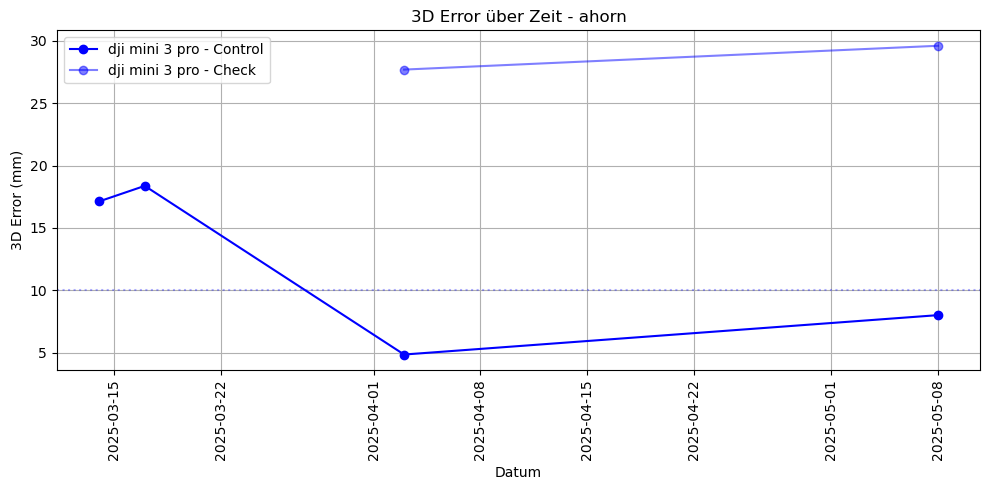

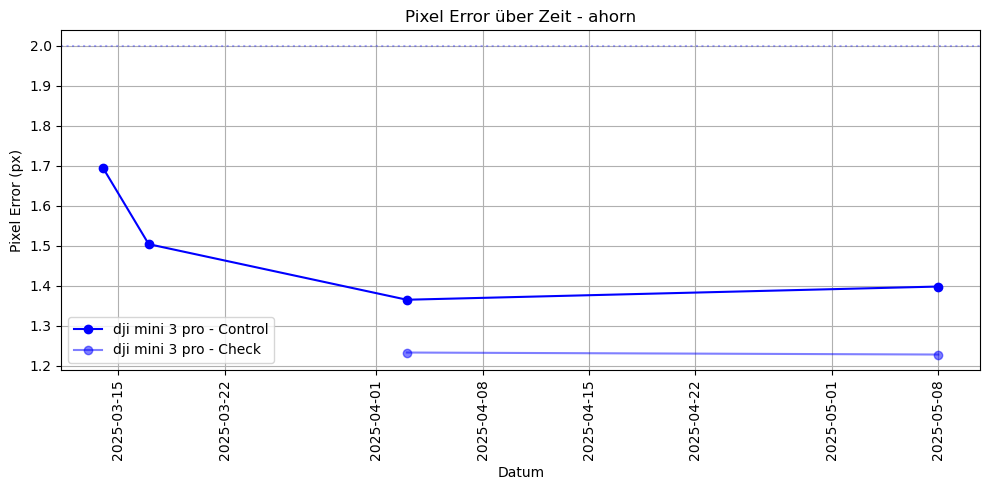

In [15]:
# Datentypen anpassen
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')
df['3D_ERROR CHECK'] = pd.to_numeric(df['3D_ERROR CHECK'], errors='coerce')
df['PIX_ERRROR CHECK'] = pd.to_numeric(df['PIX_ERRROR CHECK'], errors='coerce')

# Farbschema für Drohnen
color_map = {
    'dji mini 3 pro': 'blue',
    'dji phantom 4 rtk': 'green',
    'cranecam': 'red'
}

# Referenzlinien
reference_lines = {
    'dji mini 3 pro': {'PIX': 2.0, '3D': 10},
    'dji phantom 4 rtk': {'PIX': 2.0, '3D': 10},
    'cranecam': {'PIX': 0.5, '3D': 15}
}

# Daten für spezifischen Baum filtern
tree_name = "ahorn"
tree_df = df[df['baum'] == tree_name]

# 3D Error Plot
fig_3d, ax_3d = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_3d.axhline(reference_lines[drone]['3D'], color=color, linestyle=':', alpha=0.3)
ax_3d.set_title(f'3D Error über Zeit - {tree_name}')
ax_3d.set_ylabel('3D Error (mm)')
ax_3d.set_xlabel('Datum')
ax_3d.tick_params(axis='x', labelrotation=90)
ax_3d.legend()
ax_3d.grid(True)
plt.tight_layout()
plt.show()

# Pixel Error Plot
fig_pix, ax_pix = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_pix.axhline(reference_lines[drone]['PIX'], color=color, linestyle=':', alpha=0.3)
ax_pix.set_title(f'Pixel Error über Zeit - {tree_name}')
ax_pix.set_ylabel('Pixel Error (px)')
ax_pix.set_xlabel('Datum')
ax_pix.tick_params(axis='x', labelrotation=90)
ax_pix.legend()
ax_pix.grid(True)
plt.tight_layout()
plt.show()


### 3. Visualisierung der RMSE Werte der Linde (Zeitreihe)

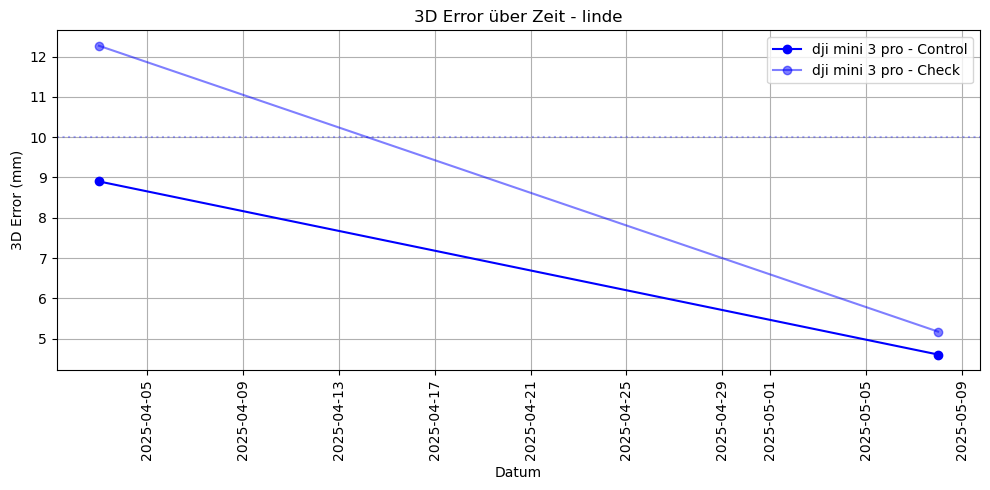

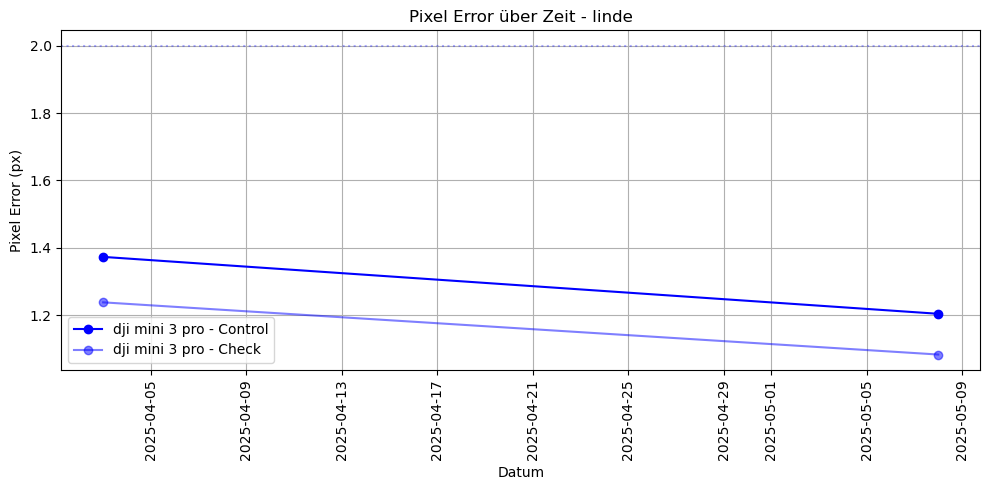

In [16]:
# Datentypen anpassen
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')
df['3D_ERROR CHECK'] = pd.to_numeric(df['3D_ERROR CHECK'], errors='coerce')
df['PIX_ERRROR CHECK'] = pd.to_numeric(df['PIX_ERRROR CHECK'], errors='coerce')

# Farbschema für Drohnen
color_map = {
    'dji mini 3 pro': 'blue',
    'dji phantom 4 rtk': 'green',
    'cranecam': 'red'
}

# Referenzlinien
reference_lines = {
    'dji mini 3 pro': {'PIX': 2.0, '3D': 10},
    'dji phantom 4 rtk': {'PIX': 2.0, '3D': 10},
    'cranecam': {'PIX': 0.5, '3D': 15}
}

# Daten für spezifischen Baum filtern
tree_name = "linde"
tree_df = df[df['baum'] == tree_name]

# 3D Error Plot
fig_3d, ax_3d = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_3d.axhline(reference_lines[drone]['3D'], color=color, linestyle=':', alpha=0.3)
ax_3d.set_title(f'3D Error über Zeit - {tree_name}')
ax_3d.set_ylabel('3D Error (mm)')
ax_3d.set_xlabel('Datum')
ax_3d.tick_params(axis='x', labelrotation=90)
ax_3d.legend()
ax_3d.grid(True)
plt.tight_layout()
plt.show()

# Pixel Error Plot
fig_pix, ax_pix = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_pix.axhline(reference_lines[drone]['PIX'], color=color, linestyle=':', alpha=0.3)
ax_pix.set_title(f'Pixel Error über Zeit - {tree_name}')
ax_pix.set_ylabel('Pixel Error (px)')
ax_pix.set_xlabel('Datum')
ax_pix.tick_params(axis='x', labelrotation=90)
ax_pix.legend()
ax_pix.grid(True)
plt.tight_layout()
plt.show()


### 4. Visualisierung der RMSE Werte der Baumgruppe Winterthur (Zeitreihe)

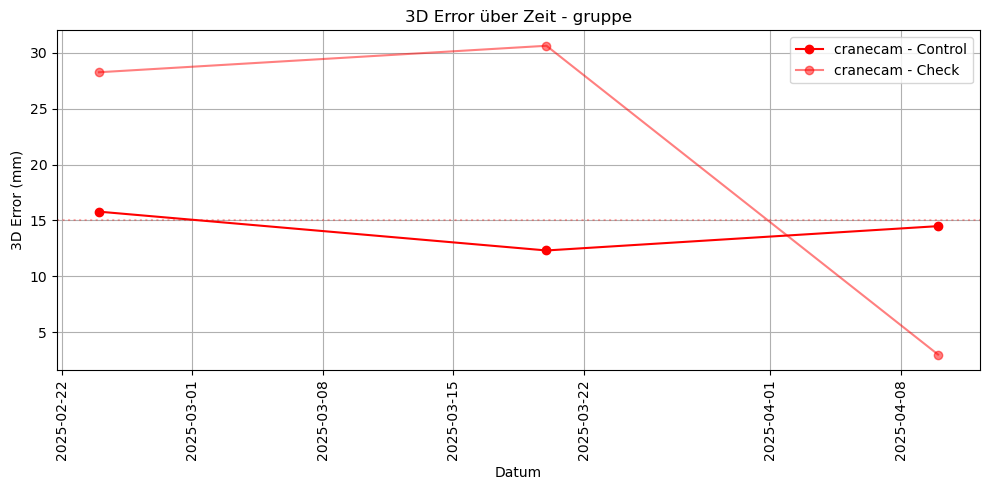

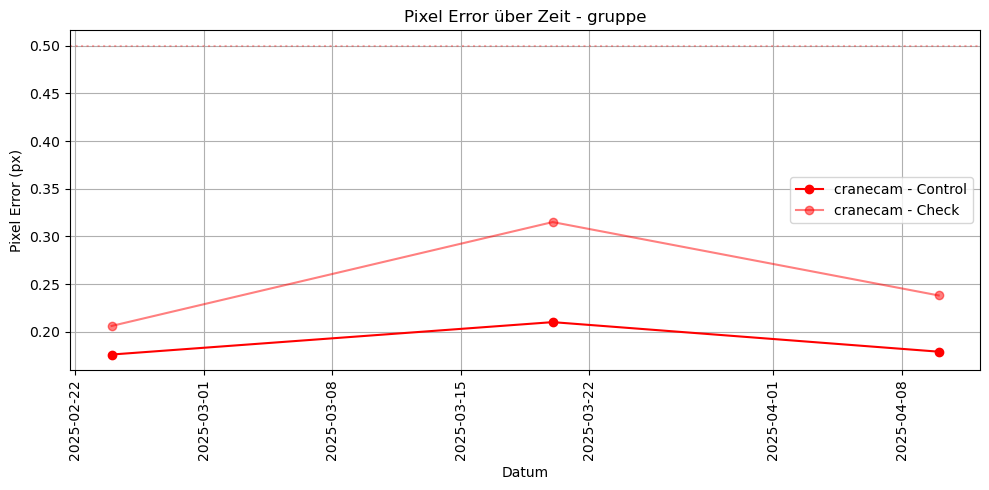

In [17]:
# Datentypen anpassen
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')
df['3D_ERROR CHECK'] = pd.to_numeric(df['3D_ERROR CHECK'], errors='coerce')
df['PIX_ERRROR CHECK'] = pd.to_numeric(df['PIX_ERRROR CHECK'], errors='coerce')

# Farbschema für Drohnen
color_map = {
    'dji mini 3 pro': 'blue',
    'dji phantom 4 rtk': 'green',
    'cranecam': 'red'
}

# Referenzlinien
reference_lines = {
    'dji mini 3 pro': {'PIX': 2.0, '3D': 10},
    'dji phantom 4 rtk': {'PIX': 2.0, '3D': 10},
    'cranecam': {'PIX': 0.5, '3D': 15}
}

# Daten für spezifischen Baum filtern
tree_name = "gruppe"
tree_df = df[df['baum'] == tree_name]

# 3D Error Plot
fig_3d, ax_3d = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_3d.axhline(reference_lines[drone]['3D'], color=color, linestyle=':', alpha=0.3)
ax_3d.set_title(f'3D Error über Zeit - {tree_name}')
ax_3d.set_ylabel('3D Error (mm)')
ax_3d.set_xlabel('Datum')
ax_3d.tick_params(axis='x', labelrotation=90)
ax_3d.legend()
ax_3d.grid(True)
plt.tight_layout()
plt.show()

# Pixel Error Plot
fig_pix, ax_pix = plt.subplots(figsize=(10, 5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_pix.axhline(reference_lines[drone]['PIX'], color=color, linestyle=':', alpha=0.3)
ax_pix.set_title(f'Pixel Error über Zeit - {tree_name}')
ax_pix.set_ylabel('Pixel Error (px)')
ax_pix.set_xlabel('Datum')
ax_pix.tick_params(axis='x', labelrotation=90)
ax_pix.legend()
ax_pix.grid(True)
plt.tight_layout()
plt.show()
